In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/produce-prices-dataset/ProductPriceIndex.csv


In [ ]:
df = pd.read_csv('/kaggle/input/produce-prices-dataset/ProductPriceIndex.csv',parse_dates=[1])

In [ ]:
df.head()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
0,Strawberries,2019-05-19,$1.16,$2.23,$1.70,$1.99,$2.54,82.33%
1,Romaine Lettuce,2019-05-19,$0.35,$1.72,$2.00,$1.69,$1.99,428.57%
2,Red Leaf Lettuce,2019-05-19,$0.32,$1.84,$1.84,$1.69,$1.89,467.19%
3,Potatoes,2019-05-19,$1.50,$5.32,$5.14,$3.99,$6.22,244.50%
4,Oranges,2019-05-19,$0.41,$1.42,$1.45,$1.34,$2.05,281.71%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15766 entries, 0 to 15765
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   productname       15766 non-null  object        
 1   date              15766 non-null  datetime64[ns]
 2   farmprice         15766 non-null  object        
 3   atlantaretail     15766 non-null  object        
 4   chicagoretail     15766 non-null  object        
 5   losangelesretail  15766 non-null  object        
 6   newyorkretail     15766 non-null  object        
 7   averagespread     15766 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 985.5+ KB


Most of the columns aren't in the appropriate format.

In [ ]:
df['farmprice'] = pd.to_numeric(df.farmprice.apply(lambda a: a.strip('$')), errors='coerce')

In [ ]:
df.farmprice.dtype

dtype('float64')

In [ ]:
df['atlantaretail'] = pd.to_numeric(df.atlantaretail.apply(lambda a: a.strip('$')), errors='coerce')
df['chicagoretail'] = pd.to_numeric(df.chicagoretail.apply(lambda a: a.strip('$')), errors='coerce')
df['losangelesretail'] = pd.to_numeric(df.losangelesretail.apply(lambda a: a.strip('$')), errors='coerce')
df['newyorkretail'] = pd.to_numeric(df.newyorkretail.apply(lambda a: a.strip('$')), errors='coerce')
df['averagespread'] = pd.to_numeric(df.averagespread.apply(lambda a: a.strip('%')), errors='coerce')

In [ ]:
df.isnull().sum()

productname           0
date                  0
farmprice             1
atlantaretail         1
chicagoretail         0
losangelesretail      0
newyorkretail         8
averagespread       130
dtype: int64

In [ ]:
df.dropna(subset=['newyorkretail','atlantaretail','chicagoretail','farmprice'],inplace=True)

In [ ]:
df.isnull().sum()

productname           0
date                  0
farmprice             0
atlantaretail         0
chicagoretail         0
losangelesretail      0
newyorkretail         0
averagespread       130
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15756 entries, 0 to 15765
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   productname       15756 non-null  object        
 1   date              15756 non-null  datetime64[ns]
 2   farmprice         15756 non-null  float64       
 3   atlantaretail     15756 non-null  float64       
 4   chicagoretail     15756 non-null  float64       
 5   losangelesretail  15756 non-null  float64       
 6   newyorkretail     15756 non-null  float64       
 7   averagespread     15626 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB


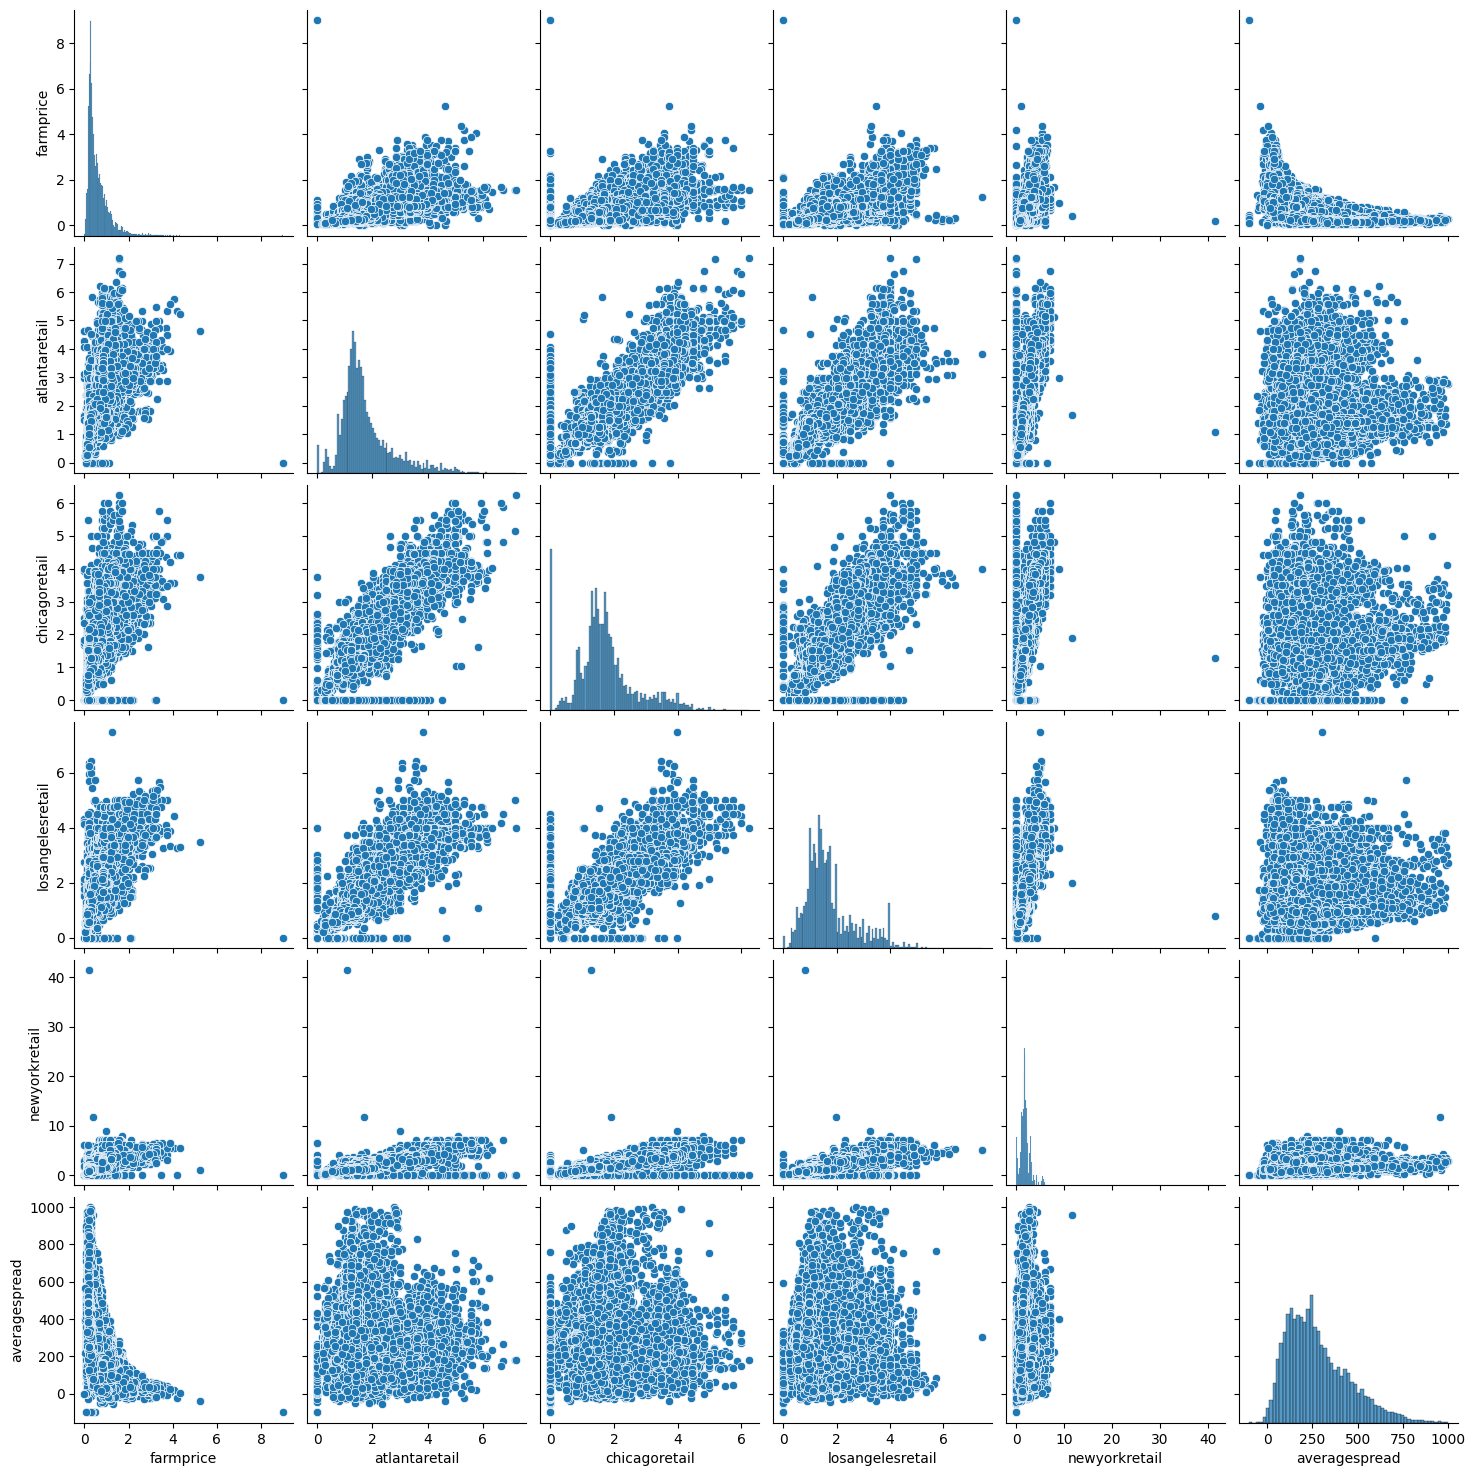

In [ ]:
sns.pairplot(df)

In [ ]:
df.duplicated().sum()

51

There are 51 duplicates; going to check them out.

In [ ]:
df[df.duplicated(keep=False)]

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
2516,Broccoli Crowns,2016-01-31,0.36,1.85,1.92,1.87,1.82,418.06
2520,Broccoli Crowns,2016-01-31,0.36,1.85,1.92,1.87,1.82,418.06
3650,Carrots,2014-08-10,0.26,0.96,0.89,0.96,1.07,273.08
3651,Avocados,2014-08-10,0.79,1.48,1.23,1.17,1.16,59.49
3652,Broccoli Bunches,2014-08-10,0.97,2.19,1.69,1.29,2.32,93.04
...,...,...,...,...,...,...,...,...
5521,Avocados,2012-04-08,0.72,1.23,0.98,1.02,1.50,64.24
5522,Romaine Lettuce,2012-04-08,0.21,2.03,2.46,1.37,2.80,930.95
5523,Potatoes,2012-04-08,1.40,4.36,4.37,3.26,0.00,114.11
5524,Broccoli Bunches,2012-04-08,0.27,2.45,2.27,1.32,2.49,689.81


Going to keep the duplicates as removing them might affect analysis.

In [ ]:
df.describe(include='all')

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
count,15756,15756,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15626.000000
unique,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Broccoli Crowns,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2009-06-16 13:41:59.725818880,0.595176,1.755848,1.716295,1.721091,1.973470,279.340059
min,NaN,1999-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000
25%,NaN,2004-09-05 00:00:00,0.280000,1.190000,1.220000,1.120000,1.370000,147.500000
50%,NaN,2009-05-10 00:00:00,0.430000,1.510000,1.610000,1.490000,1.790000,244.615000
75%,NaN,2014-04-14 18:00:00,0.780000,2.080000,2.070000,1.990000,2.320000,380.970000
max,NaN,2019-05-19 00:00:00,9.000000,7.210000,6.240000,7.460000,41.490000,999.040000


**Broccoli Crowns** is the most frequent product; 1017.
There is an outlier in the *newyorkretail* column; the max value of 41.49.

In [ ]:
df.columns

Index(['productname', 'date', 'farmprice', 'atlantaretail', 'chicagoretail',
       'losangelesretail', 'newyorkretail', 'averagespread'],
      dtype='object')

In [ ]:
numerical = df.select_dtypes(exclude=['object','datetime64'])
numerical = numerical[numerical.columns[:-1]]

In [ ]:
pd.melt(numerical)

,variable,value
0,farmprice,1.16
1,farmprice,0.35
2,farmprice,0.32
3,farmprice,1.50
4,farmprice,0.41
...,...,...
78775,newyorkretail,1.15
78776,newyorkretail,1.10
78777,newyorkretail,0.92
78778,newyorkretail,0.59


In [ ]:
numerical.notnull().sum()

farmprice           15756
atlantaretail       15756
chicagoretail       15756
losangelesretail    15756
newyorkretail       15756
dtype: int64

<Axes: xlabel='variable', ylabel='value'>

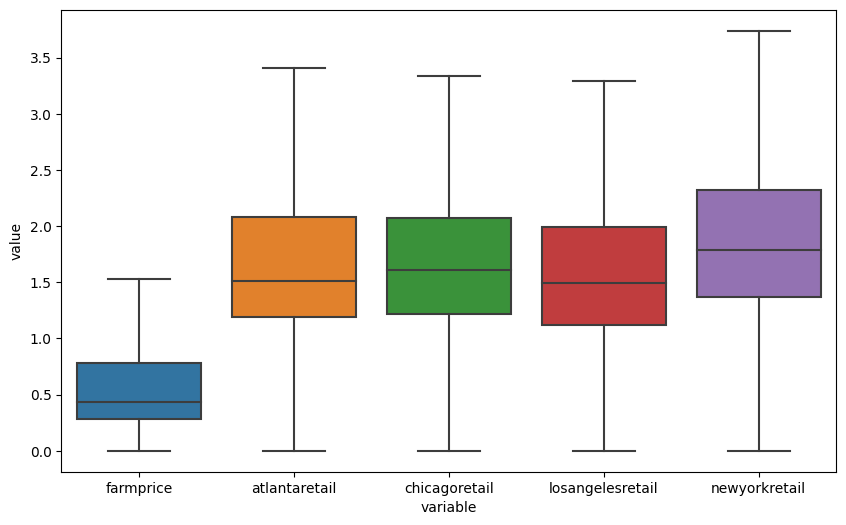

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=pd.melt(numerical),x='variable',y='value', showfliers=False)

**NewYork retail** has the highest average price while **Los Angeles retail** has the lowest average price.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'farmprice'),
  Text(1, 0, 'losangelesretail'),
  Text(2, 0, 'atlantaretail'),
  Text(3, 0, 'chicagoretail'),
  Text(4, 0, 'newyorkretail')])

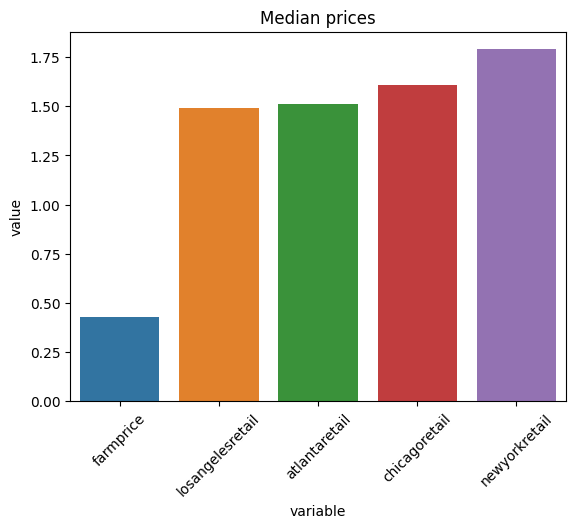

In [ ]:
sns.barplot(data=pd.melt(numerical),x='variable',y='value', errorbar=None, order=pd.melt(numerical).groupby('variable')['value'].agg('median').sort_values().index, estimator='median')
plt.title('Median prices')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'farmprice'),
  Text(1, 0, 'chicagoretail'),
  Text(2, 0, 'losangelesretail'),
  Text(3, 0, 'atlantaretail'),
  Text(4, 0, 'newyorkretail')])

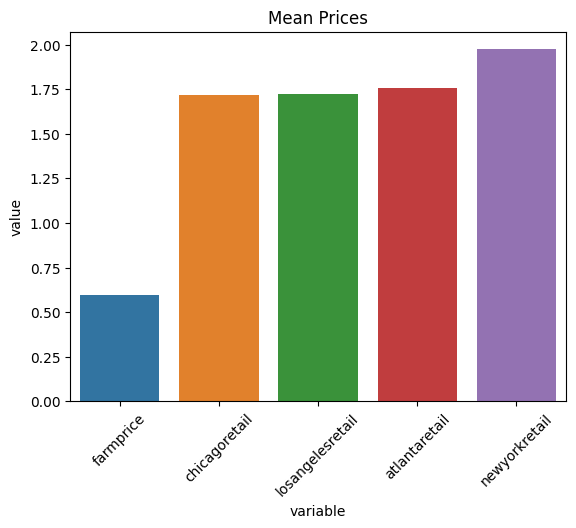

In [ ]:
sns.barplot(data=pd.melt(numerical),x='variable',y='value', errorbar=None, order=pd.melt(numerical).groupby('variable')['value'].agg('mean').sort_values().index)
plt.title('Mean Prices')
plt.xticks(rotation=45)

Hypothesis: The difference between the retail prices isnt by chance; there are factors that caused the difference.

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
f_stat, pval = f_oneway(df['newyorkretail'],df['chicagoretail'],df['losangelesretail'],df['atlantaretail'])
if pval<0.05:
    print('The difference in retail prices is not by chance between atleast two locations.')
else:
    print('The difference in retail prices is by chance.')

The difference in retail prices is not by chance between atleast two locations.


In [ ]:
numerical.isnull().sum()

farmprice           0
atlantaretail       0
chicagoretail       0
losangelesretail    0
newyorkretail       0
dtype: int64

In [ ]:
print(pval)

2.335156966312966e-153


going to check which difference in retail prices isn't by chance.

In [ ]:
data = pd.melt(numerical[numerical.columns[1:]])
results = pairwise_tukeyhsd(data.value,data.variable)
print(results)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
   atlantaretail    chicagoretail  -0.0396 0.0024 -0.0684 -0.0107   True
   atlantaretail losangelesretail  -0.0348 0.0107 -0.0636 -0.0059   True
   atlantaretail    newyorkretail   0.2176    0.0  0.1888  0.2465   True
   chicagoretail losangelesretail   0.0048 0.9739 -0.0241  0.0337  False
   chicagoretail    newyorkretail   0.2572    0.0  0.2283   0.286   True
losangelesretail    newyorkretail   0.2524    0.0  0.2235  0.2812   True
------------------------------------------------------------------------


there is a high probability that the difference between chicago retail and losangeles retail prices is by chance; the differences between other prices are not by chance; influenced by certain factors.